In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import scipy.signal
import re
import seaborn as sns
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import copy
import sklearn.metrics as sm

def touch(fname):
    if os.path.exists(fname):
        os.utime(fname, None)
    else:
        os.mkdir(fname)

In [2]:
import sklearn

In [3]:
from lmfit import Model 
import lmfit

In [4]:
import lifefit as lf

In [5]:
import matplotlib.gridspec as gridspec

In [6]:
! pip install matplotlib-label-lines

In [7]:
from labellines import labelLines

In [8]:
def half_max(Y):
    return max(Y) / 2.
    
def find_nearest(array, value):
    
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#FWHM(df2.iloc[0]['spec'][0,:],df2.iloc[0]['spec'][1,:])
def fwhm_abs(spec,exind,cutoff_l,cutoff_h):
    spec_cut=spec['spec'][cutoff_l:cutoff_h,:]
    print(spec['file_name'])
    exind+=1
    max_ind=np.where(spec_cut[:,1]==np.amax(spec_cut[:,1]))[0][0]
    nearl=find_nearest(spec_cut[:max_ind,1],half_max(spec_cut[:,1]))
    nearr=find_nearest(spec_cut[max_ind:,1],half_max(spec_cut[:,1]))
    indl=np.where(spec_cut[:,1]==nearl)
    indr=np.where(spec_cut[:,1]==nearr)
    
    return indr[0][-1]-indl[0][0]

In [9]:
def ex(wl):
    ind=wl-385
    return int(ind)

def em(wl):
    ind=wl-400
    return int(ind)

def half_max(Y):
    return max(Y) / 2.
    
def find_nearest(array, value):
    
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#FWHM(df2.iloc[0]['spec'][0,:],df2.iloc[0]['spec'][1,:])
def fwhm(spec):
    print(spec['file_name'])
    #exind+=1
    max_ind=np.where(spec['spec'][:,1]==np.amax(spec['spec'][:,1]))[0][0]
    nearl=find_nearest(spec['spec'][:max_ind,1],half_max(spec['spec'][:,1]))
    nearr=find_nearest(spec['spec'][max_ind:,1],half_max(spec['spec'][:,1]))
    indl=np.where(spec['spec'][:,1]==nearl)
    indr=np.where(spec['spec'][:,1]==nearr)
    
    return indr[0][-1]-indl[0][0]



In [10]:
def monoExp(x, m, t, b):
    return m * np.exp(-x/t) + b

def biExp(x, m1, t1, m2, t2, b):
    return m1 * np.exp(-x/t1) + m2 * np.exp(-x/t2) + b

In [11]:
def monoexp_dec_df(value,x):
  print(x.name)
  argmax=np.argmax(value[:,1])
  for n in range(1,4):
    if value[-n,1] >0.9*argmax:
      value[-n,1]=value[-(n+1),1]
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0]))
  yv=np.asarray(value[argmax:,1]/1000)
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv,p0,maxfev=100000)
  m, t, b = params
  print(t)
  return t

In [12]:
def monoexp_dec(spec,p,skip):
  argmax=skip+np.argmax(spec[:,1])
  #for n in range(1,4):
  #  if spec[-n,1] >0.9*argmax:
  #    spec[-n,1]=spec[-(n+1),1]
  #xv=np.asarray(spec[argmax:,0])
  xv=np.asarray((spec[argmax:,0]-spec[argmax-1,0]))
  yv=np.asarray(spec[argmax:,1])
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv,p,maxfev=500000)
  m, t, b = params
  print(m,t,b)
  return m,t,b

def biexp_dec(spec,p,skip):
  argmax=skip+np.argmax(spec[:,1])
  for n in range(1,4):
    if spec[-n,1] >0.9*argmax:
      spec[-n,1]=spec[-(n+1),1]
  xv=np.asarray((spec[argmax:,0]-spec[argmax-1,0]))
  yv=np.asarray(spec[argmax:,1])
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(biExp, xv, yv,p,maxfev=800000)
  m1, t1, m2, t2, b = params
  print(m1,t1,m2,t2,b)
  return m1,t1,m2,t2,b

In [13]:
filesPL=glob.glob("*.txt")
filesdictPL=dict.fromkeys(filesPL,1)

In [14]:
def import_raw(filesdict):
    for key in filesdict:
        print(key)
        if "LT" in key:
            tempdata=pd.read_csv(key,skiprows=9,header=None,sep=',')
            datarr=np.squeeze(np.array(tempdata))
            datarr=datarr[:,:-1]
            dataint=datarr.astype(float)
            filesdict[key]=dataint   
            dataint[:,1]*= (100000.0/dataint[:,1].max())
            filesdict[key]=dataint 
        else:
            tempdata=pd.read_csv(key,skiprows=21,header=None,sep=',')
            datarr=np.squeeze(np.array(tempdata))
            datarr=datarr[:,:-1]
            dataint=datarr.astype(float)
            filesdict[key]=dataint       
    return copy.deepcopy(filesdict)

In [15]:
folder='/Users/aaron/Documents/Uni/PhD/My_research/Data/Edinburgh/20230224/'
os.chdir(folder)
touch(folder+'/png')
filesPL=glob.glob("*.txt")
filesdictPL=dict.fromkeys(filesPL,1)

datadict=import_raw(filesdictPL)

pPD_10ul_25C_EM375.txt
mPD_LT450_EM460_IRF.txt
pPD_10ul_60C_LT375_EM590.txt
oPD_10ul_55C_EM450.txt
pPD_10ul_55C_LT375_EM590.txt
pPD_10ul_30C_LT375_EM590.txt
mPD_25ul_40C_EM450.txt
mPD_25ul_15C_EM450.txt
mPD_25ul_55C_LT450.txt
mPD_25ul_62C_LT450.txt
oPD_10ul_40C_LT450.txt
oPD_10ul_15C_LT450.txt
mPD_25ul_45C_EM450.txt
pPD_10ul_15C_LT375_EM590.txt
pPD_10ul_62.5C_LT375_EM590.txt
mPD_25ul_10C_EM450.txt
oPD_10ul_50C_EM450.txt
oPD_LT450_EM460_IRF.txt
oPD_10ul_45C_LT450.txt
oPD_10ul_10C_LT450.txt
mPD_25ul_50C_LT450.txt
pPD_10ul_45C_LT375_EM590.txt
pPD_10ul_20C_LT375_EM590.txt
pPD_10ul_20C_EM375.txt
pPD_10ul_25C_LT375_EM590.txt
mPD_25ul_10C_ex_dep.txt
pPD_10ul_40C_LT375_EM590.txt
pPD_10ul_10C_EM375.txt
pPD_10ul_45C_EM375.txt
mPD_25ul_60C_LT450.txt
oPD_10ul_62.5C_LT450.txt
mPD_25ul_35C_LT450.txt
pPD_10ul_10C_EM375_2.txt
pPD_10ul_10C_LT375_EM590.txt
oPD_10ul_20C_LT450.txt
oPD_10ul_60C_EM450.txt
oPD_10ul_35C_EM450.txt
mPD_25ul_20C_EM450.txt
pPD_10ul_35C_LT375_EM590.txt
oPD_10ul_25C_LT450.txt
mPD_2

In [16]:
checker3='(.*)_(.*)ul_(.*)C_(.*).txt'
df2=pd.DataFrame(index=None,columns=('CD','amount','temperature','measurement','file_name','spec'))
for key in datadict: 
  if re.search(checker3,key) is not None: 
    CD=np.str(re.search(checker3,key).group(1))
    amount=np.int(re.search(checker3,key).group(2))
    temperature=np.float(re.search(checker3,key).group(3))
    mes=re.search(checker3,key).group(4)
    if 'LT' in mes:
      mes='LT'
    else:
      mes='EM'
    #print(typ)
    dat=pd.DataFrame([[CD,amount,temperature,mes,key,filesdictPL[key]]]) 
    dat.columns=df2.columns 
    df2=df2.append(dat,ignore_index=True) 

In [17]:
df2['max']=df2.apply(lambda x: np.nanmax(x['spec'][1:,:]) if 'EM' in x.measurement else np.nan, axis=1)

In [18]:
df2['max_em']=df2.apply(lambda x: np.amin(x['spec'][:,0])+(np.where(x['spec'][:,1]==np.amax(x['spec'][:,1]))[0][0]) if 'EM' in x.measurement else np.nan, axis=1)

In [19]:
df2['FWHM']=df2.apply(lambda x: fwhm(x) if 'EM' in x.measurement else np.nan, axis=1)

pPD_10ul_25C_EM375.txt
oPD_10ul_55C_EM450.txt
mPD_25ul_40C_EM450.txt
mPD_25ul_15C_EM450.txt
mPD_25ul_45C_EM450.txt
mPD_25ul_10C_EM450.txt
oPD_10ul_50C_EM450.txt
pPD_10ul_20C_EM375.txt
mPD_25ul_10C_ex_dep.txt
pPD_10ul_10C_EM375.txt
pPD_10ul_45C_EM375.txt
pPD_10ul_10C_EM375_2.txt
oPD_10ul_60C_EM450.txt
oPD_10ul_35C_EM450.txt
mPD_25ul_20C_EM450.txt
mPD_25ul_25C_EM450.txt
oPD_10ul_30C_EM450.txt
pPD_10ul_15C_EM375.txt
pPD_10ul_40C_EM375.txt
pPD_10ul_30C_EM375.txt
pPD_10ul_62.5C_EM375.txt
mPD_25ul_62C_EM450.txt
mPD_25ul_55C_EM450.txt
oPD_10ul_15C_EM450.txt
oPD_10ul_40C_EM450.txt
oPD_10ul_10C_EM450.txt
oPD_10ul_45C_EM450.txt
mPD_25ul_50C_EM450.txt
pPD_10ul_60C_EM375.txt
pPD_10ul_35C_EM375.txt
pPD_10ul_50C_EM375.txt
mPD_25ul_35C_EM450.txt
mPD_25ul_60C_EM450.txt
oPD_10ul_62.5C_EM450.txt
oPD_10ul_20C_EM450.txt
oPD_10ul_25C_EM450.txt
mPD_25ul_30C_EM450.txt
pPD_10ul_55C_EM375.txt


In [20]:
mLT=df2.query('CD.str.contains("mPD").values & measurement.str.contains("LT").values').copy(deep=True)

In [21]:
mPL=df2.query('CD.str.contains("mPD").values & measurement.str.contains("EM").values').copy(deep=True)

In [22]:
def biexp_plot(spec2,p,name,skip,path):
  spec=spec2.copy()
  #spec[:,1]=spec[:,1]-np.average(spec[-5:,1])
  #spec[:,1] = np.where(spec[:,1] < 0.1, 0.1, spec[:,1])   
  spec[:,1]=spec[:,1]/10000
  
  argmax=np.argmax(spec[:,1])
  m1,t1,m2,t2,b=biexp_dec(spec,p,skip)
  plt.close()
  plt.figure(figsize=(6,5))
  plt.plot(spec[:,0],spec[:,1]) 
  plt.plot(spec[argmax+skip:,0], biExp(spec[:-argmax-skip,0], m1, t1, m2,t2,b), '--', label="fitted",linewidth=3.0) 
  plt.xlim(0,100)
  plt.yscale('log')
  print(m1,t1,m2,t2,b)
  plt.xlabel('Time (ns)')
  plt.ylabel("Photons")
  plt.tight_layout()
  plt.savefig("png/"+str(path)+str(name)+"_C.png",dpi=300,facecolor='white')
  return [np.round(100*m1/(m1+m2),decimals=1),np.round(t1,decimals=3),np.round(100*m2/(m1+m2),decimals=1),np.round(t2,decimals=3)]

In [23]:
def monoexp_plot(spec2,p,name,skip,path):
  spec=spec2.copy()
  #spec[:,1]=spec[:,1]-np.average(spec[-5:,1])
  #spec[:,1] = np.where(spec[:,1] < 0.1, 0.1, spec[:,1])   
  spec[:,1]=spec[:,1]/10000
  
  argmax=np.argmax(spec[:,1])
  m,t,b=monoexp_dec(spec,p,skip)
  plt.close()
  plt.figure(figsize=(6,5))
  plt.plot(spec[:,0],spec[:,1]) 
  plt.plot(spec[argmax+skip:,0], monoExp(spec[:-argmax-skip,0], m, t,b), '--', label="fitted",linewidth=3.0) 
  plt.xlim(0,100)
  plt.yscale('log')
  print(m,t,b)
  plt.xlabel('Time (ns)')
  plt.ylabel("Photons")
  plt.tight_layout()
  plt.savefig("png/"+str(path)+str(name)+"_C.png",dpi=300,facecolor='white')
  return [np.round(t,decimals=3)]

In [24]:
def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))

def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

In [25]:
def _2gauss_plot(spec2,p,name,savename,start,end):
  spec=spec2.copy()
  x_array=np.asarray(spec[:,0])
  y_array=np.asarray(spec[:,1])
  popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, x_array, y_array, p,maxfev=100000)
  perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
  pars_1 = popt_2gauss[0:3]
  pars_2 = popt_2gauss[3:6]
  gauss_peak_1 = _1gaussian(x_array, *pars_1)
  gauss_peak_2 = _1gaussian(x_array, *pars_2)
  plt.close()
  fig = plt.figure(figsize=(6,4))
  ax1 = fig.add_subplot()

  ax1.plot(x_array, y_array, "black")
  ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'red')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

  # peak 1
  ax1.plot(x_array, gauss_peak_1, "g")
  ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
  
  # peak 2
  ax1.plot(x_array, gauss_peak_2, "y")
  ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  
  ax1.set_xlabel('Wavelength (nm)')
  ax1.set_ylabel('Intensity (a.u.)')
  ax1.set_xlim(start,end)
  ax1.set_ylim(0,1.2*max(y_array))
  fig.tight_layout()
  fig.savefig(savename+str(name)+"_C.png",dpi=300,facecolor='white')
  ret=np.append(pars_1,pars_2)
  return ret

In [26]:
def exp(x,A,B,C):
    return A*np.exp(B*x)+C

def ln(x,A,B,C,D):
    return A*np.log(B*x+C)+D

In [27]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 14,'font.weight':'normal'})

In [28]:
mLT_aug=pd.DataFrame(columns=['CD','amount','type','temp1','temp2','temperature','measurement','spec'])
for i in mLT.temperature.values:
    print(i)
    for diff in [5,10]:
        print(diff)
        if len(mLT.loc[mLT['temperature'] == i+diff])>0:
            dat1=mLT.loc[mLT['temperature'] == i+diff]
            dat2=mLT.loc[mLT['temperature'] == i]
            CD=dat1.CD.values[0]
            amount=dat1.amount.values[0]
            measurement=dat1.measurement.values[0]
            spec1=spec=copy.deepcopy(dat1.spec.values[0])
            spec2=spec=copy.deepcopy(dat2.spec.values[0])
            temp1=dat1.temperature.values[0]
            temp2=dat2.temperature.values[0]
            type='aug'
            for int in np.arange(1,abs(diff)):
                spec=spec1+(int/diff)*(spec2-spec1)
                maxv=max(spec[:,1])
                noisel=min(50,min(spec[:,1]))
                spec[:,1]=spec[:,1]+np.random.uniform(-0.5*noisel,0.5*noisel,len(spec[:,1]))
                for l in range(len(spec[:,1])):
                    spec[l,1]=spec[l,1]+np.random.uniform(-0.01*spec[l,1],0.01*spec[l,1])
                spec[:,1]=spec[:,1]*maxv/max(spec[:,1])
                temp=temp1+(int/diff)*(temp2-temp1)
                print(temp1,temp2,temp)
                dat=pd.DataFrame([[CD,amount,type,temp1,temp2,temp,measurement,spec]])
                dat.columns=mLT_aug.columns 
                mLT_aug=mLT_aug.append(dat,ignore_index=True)  
    #pLT.loc[pLT['temperature'] == i-10]
    #print(i)

55.0
5
60.0 55.0 59.0
60.0 55.0 58.0
60.0 55.0 57.0
60.0 55.0 56.0
10
62.0
5
10
50.0
5
55.0 50.0 54.0
55.0 50.0 53.0
55.0 50.0 52.0
55.0 50.0 51.0
10
60.0 50.0 59.0
60.0 50.0 58.0
60.0 50.0 57.0
60.0 50.0 56.0
60.0 50.0 55.0
60.0 50.0 54.0
60.0 50.0 53.0
60.0 50.0 52.0
60.0 50.0 51.0
60.0
5
10
35.0
5
40.0 35.0 39.0
40.0 35.0 38.0
40.0 35.0 37.0
40.0 35.0 36.0
10
45.0 35.0 44.0
45.0 35.0 43.0
45.0 35.0 42.0
45.0 35.0 41.0
45.0 35.0 40.0
45.0 35.0 39.0
45.0 35.0 38.0
45.0 35.0 37.0
45.0 35.0 36.0
30.0
5
35.0 30.0 34.0
35.0 30.0 33.0
35.0 30.0 32.0
35.0 30.0 31.0
10
40.0 30.0 39.0
40.0 30.0 38.0
40.0 30.0 37.0
40.0 30.0 36.0
40.0 30.0 35.0
40.0 30.0 34.0
40.0 30.0 33.0
40.0 30.0 32.0
40.0 30.0 31.0
15.0
5
20.0 15.0 19.0
20.0 15.0 18.0
20.0 15.0 17.0
20.0 15.0 16.0
10
25.0 15.0 24.0
25.0 15.0 23.0
25.0 15.0 22.0
25.0 15.0 21.0
25.0 15.0 20.0
25.0 15.0 19.0
25.0 15.0 18.0
25.0 15.0 17.0
25.0 15.0 16.0
40.0
5
45.0 40.0 44.0
45.0 40.0 43.0
45.0 40.0 42.0
45.0 40.0 41.0
10
50.0 40.0 49.0
50.0 

9.361397651247218 3.7886607570343656 0.01813536735476691
9.361397651247218 3.7886607570343656 0.01813536735476691
9.385744526387894 3.7068953636009665 0.01796912829725908
9.385744526387894 3.7068953636009665 0.01796912829725908
9.532856558859383 3.868109978423111 0.01767293241708424
9.532856558859383 3.868109978423111 0.01767293241708424
9.364513136379122 3.7348698323231226 0.018116704311840596
9.364513136379122 3.7348698323231226 0.018116704311840596
9.250199230063807 4.063671447935466 0.018157057297934896
9.250199230063807 4.063671447935466 0.018157057297934896
9.518016293217357 4.143570027438875 0.01847817165346686
9.518016293217357 4.143570027438875 0.01847817165346686
9.486080599287666 4.334151242227119 0.019738144374900173
9.486080599287666 4.334151242227119 0.019738144374900173
9.254427241375941 3.9974191491516877 0.01753752607788988
9.254427241375941 3.9974191491516877 0.01753752607788988
9.486789445626192 4.367908897587123 0.019754207893335162
9.486789445626192 4.3679088975871

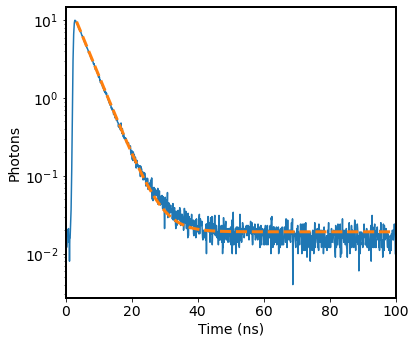

In [29]:
mLT['lifetimes']=mLT.apply(lambda x: monoexp_plot(x['spec'],(10.5,5,0.3),x['temperature'],5,"obs_LT_fit_mPD_2"), axis=1)

In [30]:
mLT=mLT.sort_values(by='temperature',ascending=True)
mLT.reset_index(inplace=True)

In [31]:
def norm(spec2,dfname):
    spec=copy.deepcopy(spec2)
    spec[:,1]=(spec[:,1]-min(spec[:,1]))
    spec[:,1]=spec[:,1]/max(dfname['max'])*1000
    return spec

def locnorm(spec2):
    spec=copy.deepcopy(spec2)
    spec[:,1]=(spec[:,1]-min(spec[:,1]))
    spec[:,1]=spec[:,1]/max(spec[:,1])*1000
    return spec

In [32]:
#pPL['max']=pPL.apply(lambda x: max(x['spec'][:,1]), axis=1)
mPL['spec_norm']=mPL['spec'].copy(deep=True)
mPL['spec_norm']=mPL.apply(lambda x: norm(x['spec_norm'],mPL), axis=1)

In [33]:
mPL=mPL.sort_values(by=['temperature'])

In [34]:
mPL

,CD,amount,temperature,measurement,file_name,spec,max,max_em,FWHM,spec_norm
14,mPD,25,10.0,EM,mPD_25ul_10C_EM450.txt,"[[460.0, 319.0], [461.0, 377.0], [462.0, 413.0...",5379.0000,499.0,61.0,"[[460.0, 8.799862247665523], [461.0, 10.669430..."
23,mPD,25,10.0,EM,mPD_25ul_10C_ex_dep.txt,"[[300.0, 7765.27881], [301.0, 7110.0376], [302...",31023.2129,456.0,165.0,"[[300.0, 21.120997754555596], [301.0, 0.0], [3..."
6,mPD,25,15.0,EM,mPD_25ul_15C_EM450.txt,"[[460.0, 290.0], [461.0, 363.0], [462.0, 414.0...",4798.0000,498.0,63.0,"[[460.0, 7.9940140564873605], [461.0, 10.34709..."
35,mPD,25,20.0,EM,mPD_25ul_20C_EM450.txt,"[[460.0, 338.0], [461.0, 358.0], [462.0, 406.0...",4704.0000,501.0,64.0,"[[460.0, 9.18666937943104], [461.0, 9.83134793..."
40,mPD,25,25.0,EM,mPD_25ul_25C_EM450.txt,"[[460.0, 293.0], [461.0, 384.0], [462.0, 443.0...",4549.0000,501.0,63.0,"[[460.0, 8.058481911781612], [461.0, 10.991769..."
70,mPD,25,30.0,EM,mPD_25ul_30C_EM450.txt,"[[460.0, 332.0], [461.0, 350.0], [462.0, 399.0...",4454.0000,498.0,65.0,"[[460.0, 9.218903307078165], [461.0, 9.7991140..."
62,mPD,25,35.0,EM,mPD_25ul_35C_EM450.txt,"[[460.0, 349.0], [461.0, 353.0], [462.0, 393.0...",4254.0000,498.0,64.0,"[[460.0, 9.799114004726443], [461.0, 9.9280497..."
5,mPD,25,40.0,EM,mPD_25ul_40C_EM450.txt,"[[460.0, 340.0], [461.0, 364.0], [462.0, 375.0...",4080.0000,501.0,66.0,"[[460.0, 9.380072945313797], [461.0, 10.153687..."
11,mPD,25,45.0,EM,mPD_25ul_45C_EM450.txt,"[[460.0, 323.0], [461.0, 387.0], [462.0, 438.0...",4193.0000,501.0,65.0,"[[460.0, 9.057733668842534], [461.0, 11.120705..."
58,mPD,25,50.0,EM,mPD_25ul_50C_EM450.txt,"[[460.0, 376.0], [461.0, 359.0], [462.0, 414.0...",4091.0000,502.0,62.0,"[[460.0, 10.701663978845982], [461.0, 10.15368..."


In [35]:
mPL=mPL.drop(23)

In [36]:
mPL['max']=mPL.apply(lambda x: np.nanmax(x['spec'][1:,:]), axis=1)

In [37]:
mPL['spec_norm']=mPL['spec'].copy(deep=True)
mPL['spec_norm']=mPL.apply(lambda x: norm(x['spec_norm'],mPL), axis=1)

In [38]:
mPL['spec_locnorm']=mPL['spec'].copy(deep=True)
mPL['spec_locnorm']=mPL.apply(lambda x: locnorm(x['spec_locnorm']), axis=1)

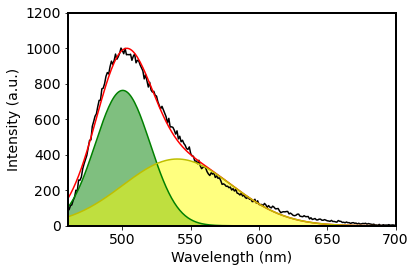

In [39]:
mPL['2fit_locnorm']=mPL.apply(lambda x: _2gauss_plot(x['spec_locnorm'],[38000, 500, 20, 34000, 540, 40],x['temperature'],"png/loc_norm_gauss_2_mPL_1_",460,700), axis=1)

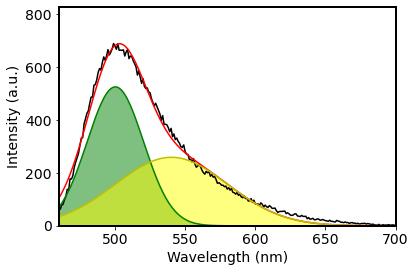

In [40]:
mPL['2fit_norm']=mPL.apply(lambda x: _2gauss_plot(x['spec_norm'],[38000, 500, 20, 34000, 540, 40],x['temperature'],"png/obs_gauss_2_mPL_1_",460,700), axis=1)

In [41]:
mPL_aug=pd.DataFrame(columns=['CD','amount','type','temp1','temp2','temperature','measurement','spec'])
for i in mPL.temperature.values:
    print(i)
    for diff in [5,10]:
        print(diff)
        if len(mPL.loc[mPL['temperature'] == i+diff])>0:
            dat1=mPL.loc[mPL['temperature'] == i+diff]
            dat2=mPL.loc[mPL['temperature'] == i]
            CD=dat1.CD.values[0]
            amount=dat1.amount.values[0]
            measurement=dat1.measurement.values[0]
            spec1=spec=copy.deepcopy(dat1.spec.values[0])
            spec2=spec=copy.deepcopy(dat2.spec.values[0])
            temp1=dat1.temperature.values[0]
            temp2=dat2.temperature.values[0]
            type='aug'
            for int in np.arange(1,abs(diff)):
                spec=spec1+(int/diff)*(spec2-spec1)
                noisel=min(50,min(spec[:,1]))
                spec[:,1]=spec[:,1]+np.random.uniform(-0.5*noisel,0.5*noisel,len(spec[:,1]))
                for l in range(len(spec[:,1])):
                    spec[l,1]=spec[l,1]+np.random.uniform(-0.02*spec[l,1],0.02*spec[l,1])
                temp=temp1+(int/diff)*(temp2-temp1)
                print(temp1,temp2,temp)
                dat=pd.DataFrame([[CD,amount,type,temp1,temp2,temp,measurement,spec]])
                dat.columns=mPL_aug.columns 
                mPL_aug=mPL_aug.append(dat,ignore_index=True)  

10.0
5
15.0 10.0 14.0
15.0 10.0 13.0
15.0 10.0 12.0
15.0 10.0 11.0
10
20.0 10.0 19.0
20.0 10.0 18.0
20.0 10.0 17.0
20.0 10.0 16.0
20.0 10.0 15.0
20.0 10.0 14.0
20.0 10.0 13.0
20.0 10.0 12.0
20.0 10.0 11.0
15.0
5
20.0 15.0 19.0
20.0 15.0 18.0
20.0 15.0 17.0
20.0 15.0 16.0
10
25.0 15.0 24.0
25.0 15.0 23.0
25.0 15.0 22.0
25.0 15.0 21.0
25.0 15.0 20.0
25.0 15.0 19.0
25.0 15.0 18.0
25.0 15.0 17.0
25.0 15.0 16.0
20.0
5
25.0 20.0 24.0
25.0 20.0 23.0
25.0 20.0 22.0
25.0 20.0 21.0
10
30.0 20.0 29.0
30.0 20.0 28.0
30.0 20.0 27.0
30.0 20.0 26.0
30.0 20.0 25.0
30.0 20.0 24.0
30.0 20.0 23.0
30.0 20.0 22.0
30.0 20.0 21.0
25.0
5
30.0 25.0 29.0
30.0 25.0 28.0
30.0 25.0 27.0
30.0 25.0 26.0
10
35.0 25.0 34.0
35.0 25.0 33.0
35.0 25.0 32.0
35.0 25.0 31.0
35.0 25.0 30.0
35.0 25.0 29.0
35.0 25.0 28.0
35.0 25.0 27.0
35.0 25.0 26.0
30.0
5
35.0 30.0 34.0
35.0 30.0 33.0
35.0 30.0 32.0
35.0 30.0 31.0
10
40.0 30.0 39.0
40.0 30.0 38.0
40.0 30.0 37.0
40.0 30.0 36.0
40.0 30.0 35.0
40.0 30.0 34.0
40.0 30.0 33.0
40.0 

In [42]:
mPL_aug['max']=mPL_aug.apply(lambda x: np.nanmax(x['spec'][1:,:]), axis=1)

In [43]:
mPL_aug

,CD,amount,type,temp1,temp2,temperature,measurement,spec,max
0,mPD,25,aug,15.0,10.0,14.0,EM,"[[460.0, 271.7378914999952], [461.0, 361.77776...",4898.675439
1,mPD,25,aug,15.0,10.0,13.0,EM,"[[460.0, 298.5553257860879], [461.0, 359.83369...",5031.923495
2,mPD,25,aug,15.0,10.0,12.0,EM,"[[460.0, 308.89613058791457], [461.0, 347.2840...",5119.392287
3,mPD,25,aug,15.0,10.0,11.0,EM,"[[460.0, 297.99281974298384], [461.0, 388.6381...",5286.169864
4,mPD,25,aug,20.0,10.0,19.0,EM,"[[460.0, 328.81968174420945], [461.0, 381.2664...",4767.489321
...,...,...,...,...,...,...,...,...,...
116,mPD,25,aug,60.0,50.0,51.0,EM,"[[460.0, 362.2505429944459], [461.0, 367.10857...",3948.334232
117,mPD,25,aug,60.0,55.0,59.0,EM,"[[460.0, 333.1376292483145], [461.0, 399.03828...",3793.648032
118,mPD,25,aug,60.0,55.0,58.0,EM,"[[460.0, 335.32204799109417], [461.0, 369.3938...",3833.700197
119,mPD,25,aug,60.0,55.0,57.0,EM,"[[460.0, 364.6745732543203], [461.0, 399.96389...",3823.303617


In [44]:
mPL_aug['spec_norm']=mPL_aug['spec'].copy(deep=True)
mPL_aug['spec_norm']=mPL_aug.apply(lambda x: norm(x['spec_norm'],mPL), axis=1)
mPL_aug['spec_locnorm']=mPL_aug['spec'].copy(deep=True)
mPL_aug['spec_locnorm']=mPL_aug.apply(lambda x: locnorm(x['spec_locnorm']), axis=1)

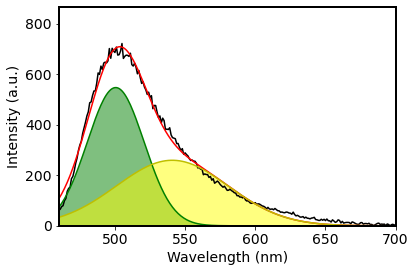

In [45]:
mPL_aug['2fit_norm']=mPL_aug.apply(lambda x: _2gauss_plot(x['spec_norm'],[38000, 500, 20, 34000, 540, 40],x['temperature'],"png/aug_gauss_2_mPL_1_",460,700), axis=1)

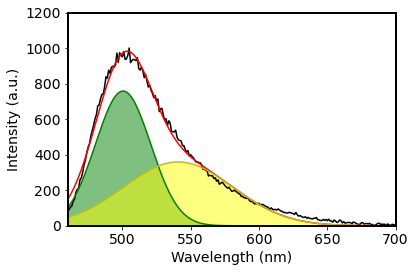

In [46]:
mPL_aug['2fit_locnorm']=mPL_aug.apply(lambda x: _2gauss_plot(x['spec_locnorm'],[38000, 500, 20, 34000, 540, 40],x['temperature'],"png/aug_locnorm_gauss_2_mPL_1_",460,700), axis=1)

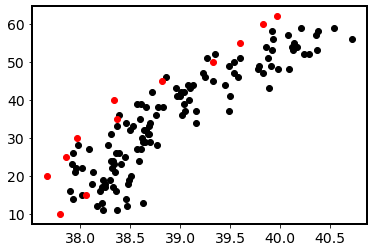

In [47]:
plt.scatter([i[5] for i in mPL_aug['2fit_norm']],mPL_aug['temperature'],color='black')
plt.scatter([i[5] for i in mPL['2fit_norm']],mPL['temperature'],color='red')
#plt.plot(y_array,ln(y_array,*popt_ln))

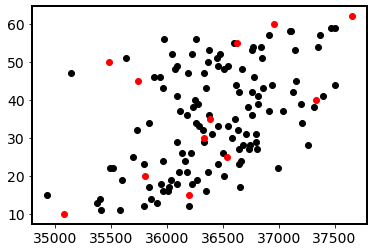

In [48]:
plt.scatter([i[3] for i in mPL_aug['2fit_locnorm']],mPL_aug['temperature'],color='black')
plt.scatter([i[3] for i in mPL['2fit_locnorm']],mPL['temperature'],color='red')
#plt.plot(y_array,ln(y_array,*popt_ln))

In [49]:
mPL_aug

,CD,amount,type,temp1,temp2,temperature,measurement,spec,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm
0,mPD,25,aug,15.0,10.0,14.0,EM,"[[460.0, 271.7378914999952], [461.0, 361.77776...",4898.675439,"[[460.0, 44.58621215160212], [461.0, 61.325359...","[[460.0, 49.278966075638536], [461.0, 67.77992...","[34335.53372716516, 500.7820253531573, 19.2138...","[37949.68957907591, 500.78204073729285, 19.213..."
1,mPD,25,aug,15.0,10.0,13.0,EM,"[[460.0, 298.5553257860879], [461.0, 359.83369...",5031.923495,"[[460.0, 50.84298997304783], [461.0, 62.235139...","[[460.0, 54.62202789752405], [461.0, 66.860928...","[34988.62077530207, 500.74725716205444, 19.107...","[37587.83288865657, 500.7472941712649, 19.1072..."
2,mPD,25,aug,15.0,10.0,12.0,EM,"[[460.0, 308.89613058791457], [461.0, 347.2840...",5119.392287,"[[460.0, 50.492490184380934], [461.0, 57.62911...","[[460.0, 53.442348230451664], [461.0, 60.99591...","[35313.53688065862, 500.7408031713121, 19.0634...","[37378.04887695213, 500.74120134792884, 19.063..."
3,mPD,25,aug,15.0,10.0,11.0,EM,"[[460.0, 297.99281974298384], [461.0, 388.6381...",5286.169864,"[[460.0, 50.330046851576306], [461.0, 67.18175...","[[460.0, 51.47943490193125], [461.0, 68.715981...","[36200.87489060197, 500.7577128299585, 19.0451...","[37028.03490164069, 500.7575702154023, 19.0451..."
4,mPD,25,aug,20.0,10.0,19.0,EM,"[[460.0, 328.81968174420945], [461.0, 381.2664...",4767.489321,"[[460.0, 55.55330730678308], [461.0, 65.303595...","[[460.0, 63.075844916164804], [461.0, 74.14643...","[32773.263940521465, 500.4500001751984, 19.076...","[37212.64788340547, 500.4506760961945, 19.0773..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,mPD,25,aug,60.0,50.0,51.0,EM,"[[460.0, 362.2505429944459], [461.0, 367.10857...",3948.334232,"[[460.0, 59.69713758804541], [461.0, 60.600284...","[[460.0, 82.18451768596503], [461.0, 83.427872...","[27795.829143257557, 500.53129946840806, 19.86...","[38265.16117613799, 500.5310206324561, 19.8641..."
117,mPD,25,aug,60.0,55.0,59.0,EM,"[[460.0, 333.1376292483145], [461.0, 399.03828...",3793.648032,"[[460.0, 56.35598727812344], [461.0, 68.607456...","[[460.0, 80.54386442066203], [461.0, 98.053640...","[26839.644283976482, 500.49376583621444, 20.23...","[38359.130514405304, 500.4936722902469, 20.236..."
118,mPD,25,aug,60.0,55.0,58.0,EM,"[[460.0, 335.32204799109417], [461.0, 369.3938...",3833.700197,"[[460.0, 56.48296544238546], [461.0, 62.817199...","[[460.0, 79.90686169394093], [461.0, 88.867949...","[27121.53186168401, 500.55580100641396, 20.180...","[38369.33693841497, 500.5558989516523, 20.1803..."
119,mPD,25,aug,60.0,55.0,57.0,EM,"[[460.0, 364.6745732543203], [461.0, 399.96389...",3823.303617,"[[460.0, 61.329552245576], [461.0, 67.89012503...","[[460.0, 87.07664209275522], [461.0, 96.391444...","[27168.640086998093, 500.47239723801545, 20.17...","[38574.099194807146, 500.47234280341536, 20.17..."


In [50]:
pmerge=pd.merge(mPL_aug, mLT_aug, how="left", on=["CD","amount","type","temp1", "temp2","temperature",])
#pobsmerge=pd.merge(oPL, oLT, how="left", on=["CD","amount","temp1", "temp2","temperature",])
pobsmerge=pd.merge(mPL, mLT, how="left", on=["CD","amount","temperature",])

9.384071663477487 4.349844444962637 0.01935499868207374
9.384071663477487 4.349844444962637 0.01935499868207374
9.452252331390298 4.348758845313129 0.01982527304358447
9.452252331390298 4.348758845313129 0.01982527304358447
9.520199599048539 4.348198283265751 0.019720082741273504
9.520199599048539 4.348198283265751 0.019720082741273504
9.499390738998704 4.358882566102236 0.01973628249880126
9.499390738998704 4.358882566102236 0.01973628249880126
9.468279382690325 4.273675568982672 0.019043045468506378
9.468279382690325 4.273675568982672 0.019043045468506378
9.141204853647427 4.287142543673297 0.01899515763258702
9.141204853647427 4.287142543673297 0.01899515763258702
9.109854494700604 4.2892509359746676 0.019223761553363614
9.109854494700604 4.2892509359746676 0.019223761553363614
9.377025652646891 4.3089823233052185 0.019124106632813342
9.377025652646891 4.3089823233052185 0.019124106632813342
9.546914800495761 4.3163514986338445 0.01934999635142643
9.546914800495761 4.316351498633844

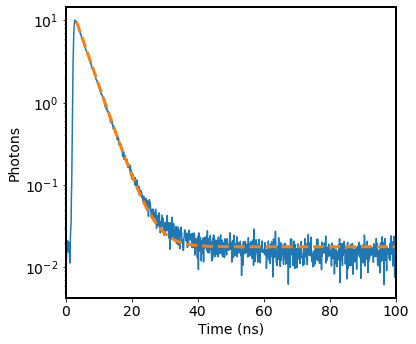

In [51]:
pmerge['lifetimes']=pmerge.apply(lambda x: monoexp_plot(x['spec_y'],(10.5,5,0.3),x['temperature'],5,"aug_LT_fit_mPD"), axis=1)

In [52]:
pmerge

,CD,amount,type,temp1,temp2,temperature,measurement_x,spec_x,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm,measurement_y,spec_y,lifetimes
0,mPD,25,aug,15.0,10.0,14.0,EM,"[[460.0, 271.7378914999952], [461.0, 361.77776...",4898.675439,"[[460.0, 44.58621215160212], [461.0, 61.325359...","[[460.0, 49.278966075638536], [461.0, 67.77992...","[34335.53372716516, 500.7820253531573, 19.2138...","[37949.68957907591, 500.78204073729285, 19.213...",LT,"[[0.0, 123.96580132560123], [0.09765625, 137.0...",[4.35]
1,mPD,25,aug,15.0,10.0,13.0,EM,"[[460.0, 298.5553257860879], [461.0, 359.83369...",5031.923495,"[[460.0, 50.84298997304783], [461.0, 62.235139...","[[460.0, 54.62202789752405], [461.0, 66.860928...","[34988.62077530207, 500.74725716205444, 19.107...","[37587.83288865657, 500.7472941712649, 19.1072...",LT,"[[0.0, 98.88485192110896], [0.09765625, 128.42...",[4.349]
2,mPD,25,aug,15.0,10.0,12.0,EM,"[[460.0, 308.89613058791457], [461.0, 347.2840...",5119.392287,"[[460.0, 50.492490184380934], [461.0, 57.62911...","[[460.0, 53.442348230451664], [461.0, 60.99591...","[35313.53688065862, 500.7408031713121, 19.0634...","[37378.04887695213, 500.74120134792884, 19.063...",LT,"[[0.0, 122.53214227150251], [0.09765625, 143.9...",[4.348]
3,mPD,25,aug,15.0,10.0,11.0,EM,"[[460.0, 297.99281974298384], [461.0, 388.6381...",5286.169864,"[[460.0, 50.330046851576306], [461.0, 67.18175...","[[460.0, 51.47943490193125], [461.0, 68.715981...","[36200.87489060197, 500.7577128299585, 19.0451...","[37028.03490164069, 500.7575702154023, 19.0451...",LT,"[[0.0, 119.28817577021766], [0.09765625, 161.4...",[4.359]
4,mPD,25,aug,20.0,10.0,19.0,EM,"[[460.0, 328.81968174420945], [461.0, 381.2664...",4767.489321,"[[460.0, 55.55330730678308], [461.0, 65.303595...","[[460.0, 63.075844916164804], [461.0, 74.14643...","[32773.263940521465, 500.4500001751984, 19.076...","[37212.64788340547, 500.4506760961945, 19.0773...",LT,"[[0.0, 94.24476613301097], [0.09765625, 180.16...",[4.274]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,mPD,25,aug,60.0,50.0,51.0,EM,"[[460.0, 362.2505429944459], [461.0, 367.10857...",3948.334232,"[[460.0, 59.69713758804541], [461.0, 60.600284...","[[460.0, 82.18451768596503], [461.0, 83.427872...","[27795.829143257557, 500.53129946840806, 19.86...","[38265.16117613799, 500.5310206324561, 19.8641...",LT,"[[0.0, 67.10612718144549], [0.09765625, 131.48...",[3.846]
117,mPD,25,aug,60.0,55.0,59.0,EM,"[[460.0, 333.1376292483145], [461.0, 399.03828...",3793.648032,"[[460.0, 56.35598727812344], [461.0, 68.607456...","[[460.0, 80.54386442066203], [461.0, 98.053640...","[26839.644283976482, 500.49376583621444, 20.23...","[38359.130514405304, 500.4936722902469, 20.236...",LT,"[[0.0, 94.73236086938873], [0.09765625, 131.81...",[3.736]
118,mPD,25,aug,60.0,55.0,58.0,EM,"[[460.0, 335.32204799109417], [461.0, 369.3938...",3833.700197,"[[460.0, 56.48296544238546], [461.0, 62.817199...","[[460.0, 79.90686169394093], [461.0, 88.867949...","[27121.53186168401, 500.55580100641396, 20.180...","[38369.33693841497, 500.5558989516523, 20.1803...",LT,"[[0.0, 95.71509324765194], [0.09765625, 133.76...",[3.744]
119,mPD,25,aug,60.0,55.0,57.0,EM,"[[460.0, 364.6745732543203], [461.0, 399.96389...",3823.303617,"[[460.0, 61.329552245576], [461.0, 67.89012503...","[[460.0, 87.07664209275522], [461.0, 96.391444...","[27168.640086998093, 500.47239723801545, 20.17...","[38574.099194807146, 500.47234280341536, 20.17...",LT,"[[0.0, 130.31974899437256], [0.09765625, 135.9...",[3.76]


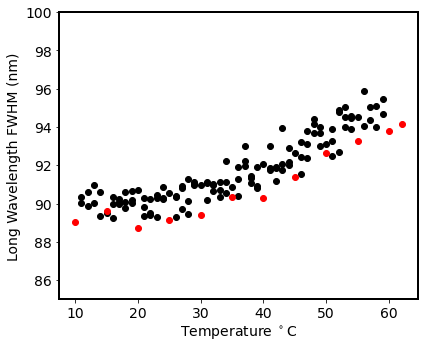

In [53]:
plt.figure(figsize=(6,5))
plt.scatter(pmerge['temperature'],[2.355*i[5] for i in pmerge['2fit_norm']],color='black')
plt.scatter(mPL['temperature'],[2.355*i[5] for i in mPL['2fit_norm']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Long Wavelength FWHM (nm)')
plt.tight_layout()
plt.ylim(85,100)
plt.savefig("m_PD_aug_data_FWHM_long.png",facecolor='white',dpi=300)

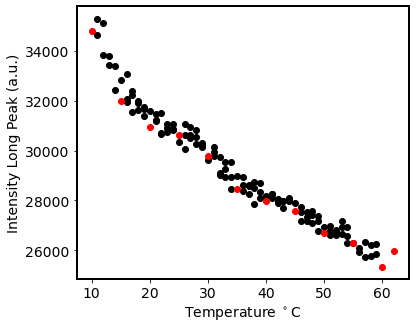

In [54]:
plt.figure(figsize=(6,4.8))
plt.scatter(pmerge['temperature'],[i[3] for i in pmerge['2fit_norm']],color='black')
plt.scatter(mPL['temperature'],[i[3] for i in mPL['2fit_norm']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Intensity Long Peak (a.u.)')
plt.tight_layout()
#plt.ylim(4000,7000)
plt.savefig("mPD_aug_data_peak_long.png",facecolor='white',dpi=300)

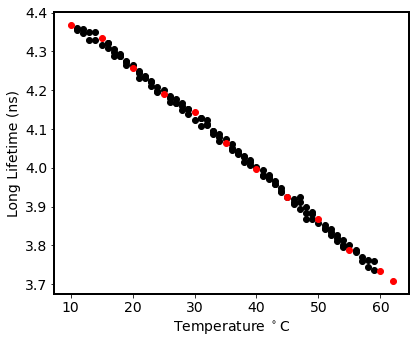

In [55]:
plt.figure(figsize=(6,5))
plt.scatter(pmerge['temperature'],[i[0] for i in pmerge['lifetimes']],color='black')
plt.scatter(mLT['temperature'],[i[0] for i in mLT['lifetimes']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Long Lifetime (ns)')
plt.tight_layout()
plt.savefig("mPD_aug_data_lt_long.png",facecolor='white',dpi=300)

In [56]:
pmerge

,CD,amount,type,temp1,temp2,temperature,measurement_x,spec_x,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm,measurement_y,spec_y,lifetimes
0,mPD,25,aug,15.0,10.0,14.0,EM,"[[460.0, 271.7378914999952], [461.0, 361.77776...",4898.675439,"[[460.0, 44.58621215160212], [461.0, 61.325359...","[[460.0, 49.278966075638536], [461.0, 67.77992...","[34335.53372716516, 500.7820253531573, 19.2138...","[37949.68957907591, 500.78204073729285, 19.213...",LT,"[[0.0, 123.96580132560123], [0.09765625, 137.0...",[4.35]
1,mPD,25,aug,15.0,10.0,13.0,EM,"[[460.0, 298.5553257860879], [461.0, 359.83369...",5031.923495,"[[460.0, 50.84298997304783], [461.0, 62.235139...","[[460.0, 54.62202789752405], [461.0, 66.860928...","[34988.62077530207, 500.74725716205444, 19.107...","[37587.83288865657, 500.7472941712649, 19.1072...",LT,"[[0.0, 98.88485192110896], [0.09765625, 128.42...",[4.349]
2,mPD,25,aug,15.0,10.0,12.0,EM,"[[460.0, 308.89613058791457], [461.0, 347.2840...",5119.392287,"[[460.0, 50.492490184380934], [461.0, 57.62911...","[[460.0, 53.442348230451664], [461.0, 60.99591...","[35313.53688065862, 500.7408031713121, 19.0634...","[37378.04887695213, 500.74120134792884, 19.063...",LT,"[[0.0, 122.53214227150251], [0.09765625, 143.9...",[4.348]
3,mPD,25,aug,15.0,10.0,11.0,EM,"[[460.0, 297.99281974298384], [461.0, 388.6381...",5286.169864,"[[460.0, 50.330046851576306], [461.0, 67.18175...","[[460.0, 51.47943490193125], [461.0, 68.715981...","[36200.87489060197, 500.7577128299585, 19.0451...","[37028.03490164069, 500.7575702154023, 19.0451...",LT,"[[0.0, 119.28817577021766], [0.09765625, 161.4...",[4.359]
4,mPD,25,aug,20.0,10.0,19.0,EM,"[[460.0, 328.81968174420945], [461.0, 381.2664...",4767.489321,"[[460.0, 55.55330730678308], [461.0, 65.303595...","[[460.0, 63.075844916164804], [461.0, 74.14643...","[32773.263940521465, 500.4500001751984, 19.076...","[37212.64788340547, 500.4506760961945, 19.0773...",LT,"[[0.0, 94.24476613301097], [0.09765625, 180.16...",[4.274]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,mPD,25,aug,60.0,50.0,51.0,EM,"[[460.0, 362.2505429944459], [461.0, 367.10857...",3948.334232,"[[460.0, 59.69713758804541], [461.0, 60.600284...","[[460.0, 82.18451768596503], [461.0, 83.427872...","[27795.829143257557, 500.53129946840806, 19.86...","[38265.16117613799, 500.5310206324561, 19.8641...",LT,"[[0.0, 67.10612718144549], [0.09765625, 131.48...",[3.846]
117,mPD,25,aug,60.0,55.0,59.0,EM,"[[460.0, 333.1376292483145], [461.0, 399.03828...",3793.648032,"[[460.0, 56.35598727812344], [461.0, 68.607456...","[[460.0, 80.54386442066203], [461.0, 98.053640...","[26839.644283976482, 500.49376583621444, 20.23...","[38359.130514405304, 500.4936722902469, 20.236...",LT,"[[0.0, 94.73236086938873], [0.09765625, 131.81...",[3.736]
118,mPD,25,aug,60.0,55.0,58.0,EM,"[[460.0, 335.32204799109417], [461.0, 369.3938...",3833.700197,"[[460.0, 56.48296544238546], [461.0, 62.817199...","[[460.0, 79.90686169394093], [461.0, 88.867949...","[27121.53186168401, 500.55580100641396, 20.180...","[38369.33693841497, 500.5558989516523, 20.1803...",LT,"[[0.0, 95.71509324765194], [0.09765625, 133.76...",[3.744]
119,mPD,25,aug,60.0,55.0,57.0,EM,"[[460.0, 364.6745732543203], [461.0, 399.96389...",3823.303617,"[[460.0, 61.329552245576], [461.0, 67.89012503...","[[460.0, 87.07664209275522], [461.0, 96.391444...","[27168.640086998093, 500.47239723801545, 20.17...","[38574.099194807146, 500.47234280341536, 20.17...",LT,"[[0.0, 130.31974899437256], [0.09765625, 135.9...",[3.76]


In [58]:
pmerge

,CD,amount,type,temp1,temp2,temperature,measurement_x,spec_x,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm,measurement_y,spec_y,lifetimes
0,mPD,25,aug,15.0,10.0,14.0,EM,"[[460.0, 271.7378914999952], [461.0, 361.77776...",4898.675439,"[[460.0, 44.58621215160212], [461.0, 61.325359...","[[460.0, 49.278966075638536], [461.0, 67.77992...","[34335.53372716516, 500.7820253531573, 19.2138...","[37949.68957907591, 500.78204073729285, 19.213...",LT,"[[0.0, 123.96580132560123], [0.09765625, 137.0...",[4.35]
1,mPD,25,aug,15.0,10.0,13.0,EM,"[[460.0, 298.5553257860879], [461.0, 359.83369...",5031.923495,"[[460.0, 50.84298997304783], [461.0, 62.235139...","[[460.0, 54.62202789752405], [461.0, 66.860928...","[34988.62077530207, 500.74725716205444, 19.107...","[37587.83288865657, 500.7472941712649, 19.1072...",LT,"[[0.0, 98.88485192110896], [0.09765625, 128.42...",[4.349]
2,mPD,25,aug,15.0,10.0,12.0,EM,"[[460.0, 308.89613058791457], [461.0, 347.2840...",5119.392287,"[[460.0, 50.492490184380934], [461.0, 57.62911...","[[460.0, 53.442348230451664], [461.0, 60.99591...","[35313.53688065862, 500.7408031713121, 19.0634...","[37378.04887695213, 500.74120134792884, 19.063...",LT,"[[0.0, 122.53214227150251], [0.09765625, 143.9...",[4.348]
3,mPD,25,aug,15.0,10.0,11.0,EM,"[[460.0, 297.99281974298384], [461.0, 388.6381...",5286.169864,"[[460.0, 50.330046851576306], [461.0, 67.18175...","[[460.0, 51.47943490193125], [461.0, 68.715981...","[36200.87489060197, 500.7577128299585, 19.0451...","[37028.03490164069, 500.7575702154023, 19.0451...",LT,"[[0.0, 119.28817577021766], [0.09765625, 161.4...",[4.359]
4,mPD,25,aug,20.0,10.0,19.0,EM,"[[460.0, 328.81968174420945], [461.0, 381.2664...",4767.489321,"[[460.0, 55.55330730678308], [461.0, 65.303595...","[[460.0, 63.075844916164804], [461.0, 74.14643...","[32773.263940521465, 500.4500001751984, 19.076...","[37212.64788340547, 500.4506760961945, 19.0773...",LT,"[[0.0, 94.24476613301097], [0.09765625, 180.16...",[4.274]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,mPD,25,aug,60.0,50.0,51.0,EM,"[[460.0, 362.2505429944459], [461.0, 367.10857...",3948.334232,"[[460.0, 59.69713758804541], [461.0, 60.600284...","[[460.0, 82.18451768596503], [461.0, 83.427872...","[27795.829143257557, 500.53129946840806, 19.86...","[38265.16117613799, 500.5310206324561, 19.8641...",LT,"[[0.0, 67.10612718144549], [0.09765625, 131.48...",[3.846]
117,mPD,25,aug,60.0,55.0,59.0,EM,"[[460.0, 333.1376292483145], [461.0, 399.03828...",3793.648032,"[[460.0, 56.35598727812344], [461.0, 68.607456...","[[460.0, 80.54386442066203], [461.0, 98.053640...","[26839.644283976482, 500.49376583621444, 20.23...","[38359.130514405304, 500.4936722902469, 20.236...",LT,"[[0.0, 94.73236086938873], [0.09765625, 131.81...",[3.736]
118,mPD,25,aug,60.0,55.0,58.0,EM,"[[460.0, 335.32204799109417], [461.0, 369.3938...",3833.700197,"[[460.0, 56.48296544238546], [461.0, 62.817199...","[[460.0, 79.90686169394093], [461.0, 88.867949...","[27121.53186168401, 500.55580100641396, 20.180...","[38369.33693841497, 500.5558989516523, 20.1803...",LT,"[[0.0, 95.71509324765194], [0.09765625, 133.76...",[3.744]
119,mPD,25,aug,60.0,55.0,57.0,EM,"[[460.0, 364.6745732543203], [461.0, 399.96389...",3823.303617,"[[460.0, 61.329552245576], [461.0, 67.89012503...","[[460.0, 87.07664209275522], [461.0, 96.391444...","[27168.640086998093, 500.47239723801545, 20.17...","[38574.099194807146, 500.47234280341536, 20.17...",LT,"[[0.0, 130.31974899437256], [0.09765625, 135.9...",[3.76]


In [59]:
pobsmerge

,CD,amount,temperature,measurement_x,file_name_x,spec_x,max_x,max_em_x,FWHM_x,spec_norm,...,2fit_locnorm,2fit_norm,index,measurement_y,file_name_y,spec_y,max_y,max_em_y,FWHM_y,lifetimes
0,mPD,25,10.0,EM,mPD_25ul_10C_EM450.txt,"[[460.0, 319.0], [461.0, 377.0], [462.0, 413.0...",5379.0,499.0,61.0,"[[460.0, 50.75292805354155], [461.0, 61.535601...",...,"[36897.65560325513, 500.6852284123739, 18.8780...","[36581.478609915466, 500.68512641550876, 18.87...",53,LT,mPD_25ul_10C_LT450.txt,"[[0.0, 140.0], [0.09765625, 170.0], [0.1953125...",NaN,NaN,NaN,[4.368]
1,mPD,25,15.0,EM,mPD_25ul_15C_EM450.txt,"[[460.0, 290.0], [461.0, 363.0], [462.0, 414.0...",4798.0,498.0,63.0,"[[460.0, 46.10522401933445], [461.0, 59.676519...",...,"[37423.660419994856, 500.6319885126287, 19.089...","[33088.81172113848, 500.63152066028, 19.089391...",46,LT,mPD_25ul_15C_LT450.txt,"[[0.0, 100.0], [0.09765625, 120.0], [0.1953125...",NaN,NaN,NaN,[4.334]
2,mPD,25,20.0,EM,mPD_25ul_20C_EM450.txt,"[[460.0, 338.0], [461.0, 358.0], [462.0, 406.0...",4704.0,501.0,64.0,"[[460.0, 52.983825989960955], [461.0, 56.70198...",...,"[36650.81286056596, 500.2714911082423, 18.8676...","[31690.416797965667, 500.2712174899252, 18.867...",68,LT,mPD_25ul_20C_LT450.txt,"[[0.0, 100.0], [0.09765625, 200.0], [0.1953125...",NaN,NaN,NaN,[4.256]
3,mPD,25,25.0,EM,mPD_25ul_25C_EM450.txt,"[[460.0, 293.0], [461.0, 384.0], [462.0, 443.0...",4549.0,501.0,63.0,"[[460.0, 46.477040342071014], [461.0, 63.39468...",...,"[36330.28621726182, 500.2623000876996, 18.9039...","[30434.481892433727, 500.2624488691238, 18.904...",71,LT,mPD_25ul_25C_LT450.txt,"[[0.0, 100.0], [0.09765625, 170.0], [0.1953125...",NaN,NaN,NaN,[4.191]
4,mPD,25,30.0,EM,mPD_25ul_30C_EM450.txt,"[[460.0, 332.0], [461.0, 350.0], [462.0, 399.0...",4454.0,498.0,65.0,"[[460.0, 53.169734151329244], [461.0, 56.51608...",...,"[36583.69514726334, 500.287854038014, 19.00853...","[29977.91807853089, 500.2874402673241, 19.0079...",38,LT,mPD_25ul_30C_LT450.txt,"[[0.0, 140.0], [0.09765625, 270.0], [0.1953125...",NaN,NaN,NaN,[4.144]
5,mPD,25,35.0,EM,mPD_25ul_35C_EM450.txt,"[[460.0, 349.0], [461.0, 353.0], [462.0, 393.0...",4254.0,498.0,64.0,"[[460.0, 56.51608105595836], [461.0, 57.259713...",...,"[37910.97300052634, 500.46716643164456, 19.458...","[29665.893614483495, 500.4675182798534, 19.458...",29,LT,mPD_25ul_35C_LT450.txt,"[[0.0, 110.0], [0.09765625, 180.0], [0.1953125...",NaN,NaN,NaN,[4.064]
6,mPD,25,40.0,EM,mPD_25ul_40C_EM450.txt,"[[460.0, 340.0], [461.0, 364.0], [462.0, 375.0...",4080.0,501.0,66.0,"[[460.0, 54.09927495817066], [461.0, 58.561070...",...,"[38065.828302563175, 500.33568278725187, 19.55...","[28526.299928516015, 500.335898298057, 19.5549...",47,LT,mPD_25ul_40C_LT450.txt,"[[0.0, 100.0], [0.09765625, 180.0], [0.1953125...",NaN,NaN,NaN,[3.997]
7,mPD,25,45.0,EM,mPD_25ul_45C_EM450.txt,"[[460.0, 323.0], [461.0, 387.0], [462.0, 438.0...",4193.0,501.0,65.0,"[[460.0, 52.24019334448782], [461.0, 64.138315...",...,"[36953.79658538631, 500.3243147920617, 19.5646...","[28517.431049712126, 500.3244646894144, 19.564...",54,LT,mPD_25ul_45C_LT450.txt,"[[0.0, 130.0], [0.09765625, 270.0], [0.1953125...",NaN,NaN,NaN,[3.925]
8,mPD,25,50.0,EM,mPD_25ul_50C_EM450.txt,"[[460.0, 376.0], [461.0, 359.0], [462.0, 414.0...",4091.0,502.0,62.0,"[[460.0, 61.721509574270314], [461.0, 58.56107...",...,"[37130.060088441285, 500.62693466897747, 19.84...","[27935.602817822783, 500.6271470036111, 19.840...",18,LT,mPD_25ul_50C_LT450.txt,"[[0.0, 90.0], [0.09765625, 140.0], [0.1953125,...",NaN,NaN,NaN,[3.868]
9,mPD,25,55.0,EM,mPD_25ul_55C_EM450.txt,"[[460.0, 361.0], [461.0, 366.0], [462.0, 464.0...",3897.0,505.0,65.0,"[[460.0, 59.86242796058747], [461.0, 60.791968...",...,"[38419.26595099948, 500.39771562049776, 19.969...","[27554.58977247616, 500.39758801695933, 19.968...",7,LT,mPD_25ul_55C_LT450.txt,"[[0.0, 140.0], [0.09765625, 160.0], [0.1953125...",NaN,NaN,NaN,[3.789]


In [ ]:
X_dat_obs

,0,1,2,3,4,5,0
0,41912.714197,537.472397,23.330184,52645.028188,581.597055,39.633026,4.798
1,40050.530283,537.776672,23.880948,48052.998295,582.603502,40.107436,4.742
2,38982.657016,537.764827,24.075250,46474.377380,582.849835,40.656163,4.647
3,36294.142123,537.157452,23.832071,45321.210097,581.586415,40.040608,4.648
4,36761.259430,537.748898,24.633529,42773.281254,582.860390,40.656098,4.548
5,36374.849166,537.753619,25.231760,43456.833072,583.242911,42.570878,4.387
6,33568.800260,536.848880,24.575395,41462.727412,581.442562,40.806238,4.431
7,34214.742684,537.411264,25.600681,40163.031667,582.912057,42.276084,4.335
8,33346.769083,537.163818,25.529188,38941.241693,582.519990,42.008208,4.313
9,33304.815254,537.236692,26.184157,38020.800754,583.034864,43.030358,4.243


In [60]:
pmerge=pmerge.sample(frac=1)

In [61]:
X_dat_aug=pd.concat([pd.DataFrame(pmerge['2fit_norm'].to_list()),pd.DataFrame(pmerge['lifetimes'].to_list())],axis=1,join='inner')

In [62]:
X_dat_obs=pd.concat([pd.DataFrame(pobsmerge['2fit_norm'].to_list()),pd.DataFrame(pobsmerge['lifetimes'].to_list())],axis=1,join='inner')

In [97]:
std=X_dat_aug.std()
mean=X_dat_aug.mean()

In [98]:
X_dat_aug-=mean
X_dat_aug/=std

In [99]:
X_dat_obs-=mean
X_dat_obs/=std

In [100]:
X_dat_train=np.array(X_dat_aug)
X_dat_test=np.array(X_dat_obs)

In [101]:
Y_dat_train=np.array(pmerge['temperature'])
Y_dat_test=np.array(pobsmerge['temperature'])

In [65]:
import sklearn.model_selection

In [102]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_dat_train, Y_dat_train, test_size=0.33, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression

In [103]:
reg = LinearRegression().fit(X_train, y_train)

In [104]:
reg.score(X_dat_train, Y_dat_train)

0.9987703239091139

In [105]:
reg.predict(X_dat_test)

array([ 9.98540505, 14.76251825, 20.78089438, 25.20408766, 29.31898569,
       35.02142568, 40.25400462, 45.22590813, 49.69180461, 54.8882614 ,
       59.43934213, 60.63870977])

In [106]:
Y_dat_test

array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 62.])

In [72]:
print(sm.mean_squared_error(y_test,reg.predict(X_test))**0.5)

0.5469912325841766


In [107]:
print(sm.mean_squared_error(Y_dat_test,reg.predict(X_dat_test))**0.5)

0.5448829409230646


In [74]:
from sklearn.neural_network import MLPRegressor

In [82]:
res=[]
for i in (2,4,8,16,32,64,128):
    for j in (1,2,4,8,16,32,64,128):
        regr = MLPRegressor(hidden_layer_sizes=(i,j),activation='relu',alpha=0.1,random_state=1, max_iter=5000)
        regr.fit(X_train, y_train)
        res.append([i,j,sm.mean_squared_error(Y_dat_test,regr.predict(X_dat_test))**0.5])

/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converge

In [124]:
res=[]
for i in (2,4,8,16,32,64,128,256,512):
        regr = MLPRegressor(hidden_layer_sizes=(i,16,4),activation='relu',alpha=0.1,random_state=1, max_iter=5000)
        regr.fit(X_train, y_train)
        res.append([i,j,sm.mean_squared_error(Y_dat_test,regr.predict(X_dat_test))**0.5])

In [125]:
res[:]

[[2, 128, 1.1716006057483415],
 [4, 128, 1.0522927011342382],
 [8, 128, 0.840393671760142],
 [16, 128, 0.9954540143404448],
 [32, 128, 0.6181479114027709],
 [64, 128, 0.8746754764749839],
 [128, 128, 0.97939892019232],
 [256, 128, 0.6980543869875541],
 [512, 128, 0.6152660657521863]]

In [151]:
print(sm.mean_squared_error(Y_dat_test,regr.predict(X_dat_test))**0.5)

152.38996100752274


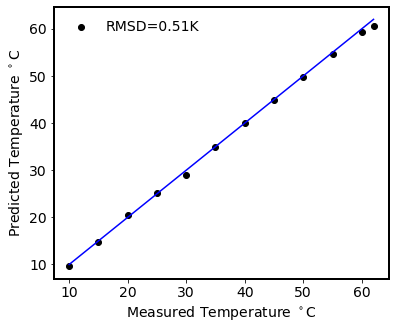

In [114]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(6,5))
plt.scatter(Y_dat_test,reg.predict(X_dat_test),label='RMSD=0.51K',color='black')
plt.plot(Y_dat_test,Y_dat_test,color='blue')
plt.legend(frameon=False)
plt.xlabel('Measured Temperature $^\circ$C')
plt.ylabel('Predicted Temperature $^\circ$C')
plt.savefig("m_PD_predict_reg_comb_2.png",facecolor='white',dpi=300)